# Cardiovascular Disease Classification & Analysis
In this notebook, I will attempt to predict the classification of an individual regarding whether or not they have a form of cardiovascular disease. According to the World Health Organization (WHO), "Cardiovascular diseases are the number 1 cause of death globally, taking an estimated 17.9 million lives each year." To me this is a shocking statistic. I was born with heart issues and thankfully have had none since birth. This topic, as a whole, is interesting and personal to me. I would love to see what story the data may tell.

In [30]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# Get Path
print('path',os.getcwd())

path C:\Users\mille\Python Projects\Cardiovascular Disease


In [26]:
# Import data set
df = pd.read_csv('C:/Users/mille/Python Projects/Cardiovascular Disease/Cardiovascular Disease.csv', sep = ';')

## Data Cleaning & Wrangling

In [17]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [18]:
# Check for missing values
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [27]:
# Drop the id column
df = df.drop('id', axis = 1)

In [24]:
# View edited data set
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [28]:
# Convert age column to years
df['age'] = round(df['age']/365,0)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


In [48]:
# Convert height column from centimeters to meters
df['height'] = df['height']/100

In [49]:
# Create feature BMI (Body Mass Index)
df['bmi'] = df['weight']/(df['height']**2)

In [50]:
# View edited data set
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.0,2,1.68,62.0,110,80,1,1,0,0,1,0,21.967120
1,55.0,1,1.56,85.0,140,90,3,1,0,0,1,1,34.927679
2,52.0,1,1.65,64.0,130,70,3,1,0,0,0,1,23.507805
3,48.0,2,1.69,82.0,150,100,1,1,0,0,1,1,28.710479
4,48.0,1,1.56,56.0,100,60,1,1,0,0,0,0,23.011177


## Exploratory Data Analysis

In [54]:
# Check the feature types
df.dtypes

age            float64
gender           int64
height         float64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
bmi            float64
dtype: object

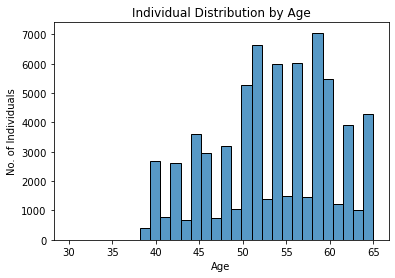

In [37]:
# Visualize age distribution
ax = sns.histplot(data = df, x = 'age', bins = 30)
ax.set(xlabel = 'Age', ylabel = 'No. of Individuals', title = 'Individual Distribution by Age')
plt.show()

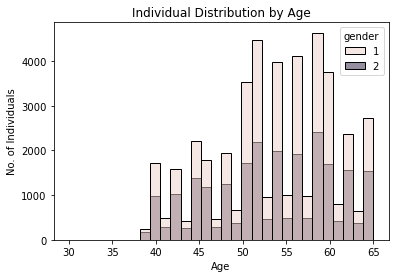

In [47]:
# Visualize age distribution based on sex
ax = sns.histplot(data = df, x = 'age', bins = 30, hue = 'gender')
ax.set(xlabel = 'Age', ylabel = 'No. of Individuals', title = 'Individual Distribution by Age')
plt.show()

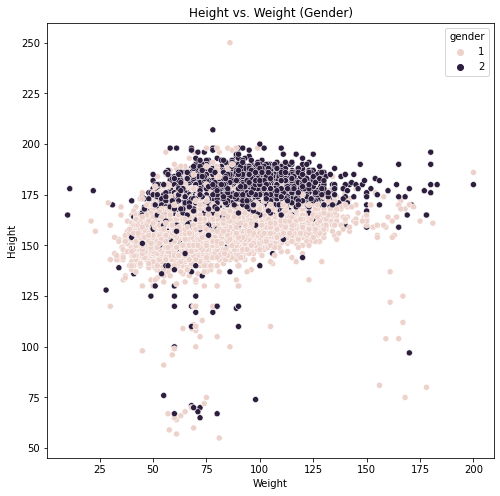

In [40]:
# Visualize distribution by height and weight based on sex
fig = plt.subplots(figsize = (8,8))
ax = sns.scatterplot(x = 'weight', y = 'height', data = df, hue = 'gender')
ax.set(xlabel = 'Weight', ylabel = 'Height', title = 'Height vs. Weight (Gender)')
plt.show()

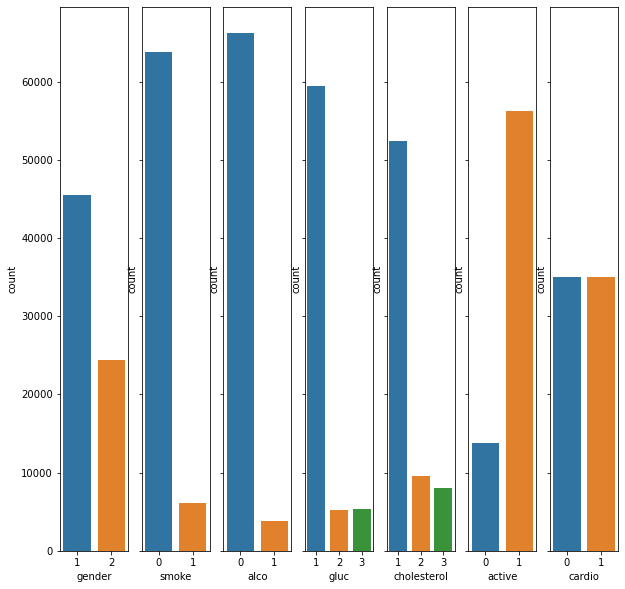

In [58]:
# Visualize the number of individuals 
fig, axs = plt.subplots(1,7, figsize = (10,10), sharex = False, sharey = True)
sns.countplot(x = 'gender', data = df, ax = axs[0])
sns.countplot(x = 'smoke', data = df, ax = axs[1])
sns.countplot(x = 'alco', data = df, ax = axs[2])
sns.countplot(x = 'gluc', data = df, ax = axs[3])
sns.countplot(x = 'cholesterol', data = df, ax = axs[4])
sns.countplot(x = 'active', data = df, ax = axs[5])
sns.countplot(x = 'cardio', data = df, ax = axs[6])
plt.show()

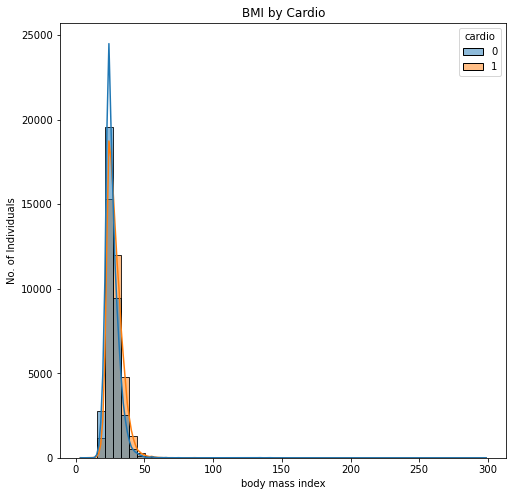

In [65]:
# Visualize the relationship between bmi and cardio
fig = plt.subplots(figsize = (8,8))
ax = sns.histplot(x = 'bmi', data = df, hue = 'cardio', bins = 50, kde = True)
ax.set(xlabel = 'body mass index', ylabel = 'No. of Individuals', title = 'BMI by Cardio')
plt.show()

In [60]:
# View the descriptive statistics for the data set
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,1.349571,1.643592,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,27.556513
std,6.765294,0.476838,0.082101,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.091511
min,30.000000,1.000000,0.550000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,48.000000,1.000000,1.590000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,54.000000,1.000000,1.650000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.374068
75%,58.000000,2.000000,1.700000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.222222
max,65.000000,2.000000,2.500000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


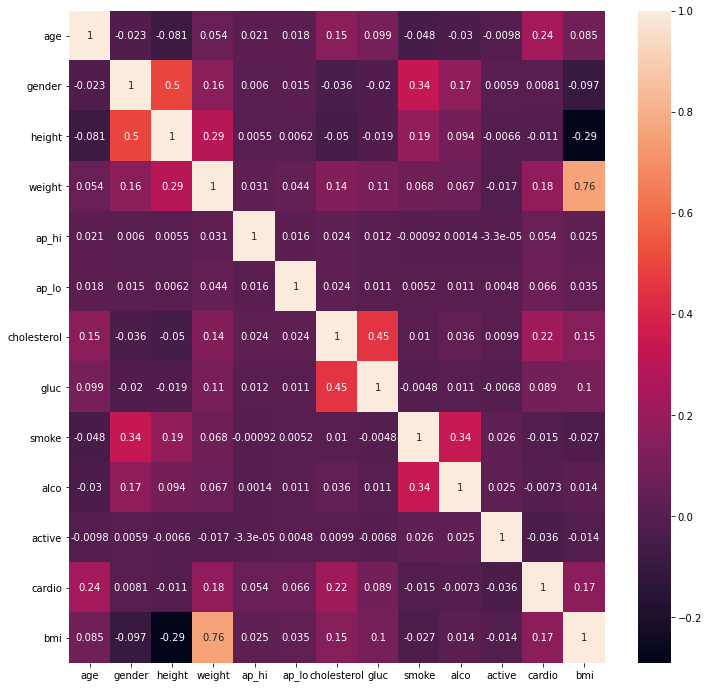

In [66]:
# View heatmap on correlation of features

# Create variable to store correlation of features
corr = df.corr()

# Build and visualize feature heatmap
fig = plt.subplots(figsize = (12,12))
ax = sns.heatmap(data = corr, annot = True)
plt.show()

In [67]:
# Drop features that don't have a tremendous impact on cardio
df = df.drop(['active','alco','smoke'], axis = 1)

# View edited data set
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,cardio,bmi
0,50.0,2,1.68,62.0,110,80,1,1,0,21.967120
1,55.0,1,1.56,85.0,140,90,3,1,1,34.927679
2,52.0,1,1.65,64.0,130,70,3,1,1,23.507805
3,48.0,2,1.69,82.0,150,100,1,1,1,28.710479
4,48.0,1,1.56,56.0,100,60,1,1,0,23.011177


## Model Building & Predictions

In [100]:
# Import machine learning libraries
from sklearn import neighbors
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
print('Libraries Imported!')

Libraries Imported!


In [69]:
# Create a variable to hold the features without cardio
X = df.drop(['cardio'], axis = 1)
y = df['cardio']

In [70]:
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Random Forest Classifier

In [87]:
# Create classifier and fit the data
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Create variable for predictors
rfc_pre = rfc.predict(X_test)

# Create data frame with actual values and predicted values
predictions = pd.DataFrame(index = y_test.index)
predictions['actual'] = y_test

# Add rfc_pre to data frame
predictions['rfc'] = rfc_pre

# Create variable for accuracy
acc_rfc = round(rfc.score(X_train, y_train)*100, 2)

# Create variable for test accuracy
acc_test_rfc = round(rfc.score(X_test, y_test)*100, 2)

In [72]:
# View the classification report
print(classification_report(y_test, rfc_pre))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71      7015
           1       0.71      0.69      0.70      6985

    accuracy                           0.70     14000
   macro avg       0.70      0.70      0.70     14000
weighted avg       0.70      0.70      0.70     14000



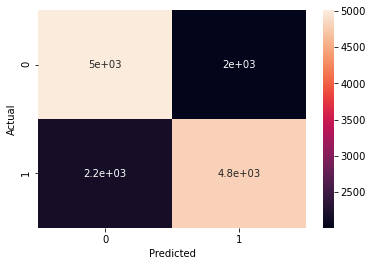

In [78]:
# Visualize confusion matrix for the Random Forest Classifier
cm = pd.DataFrame(confusion_matrix(y_test, rfc_pre))
ax = sns.heatmap(cm, annot = True)
ax.set(xlabel = 'Predicted', ylabel = 'Actual')
plt.show()

### Decision Tree Classifier

In [88]:
# Create classifier and fit the data
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Create variable for the predictors
dtc_pre = dtc.predict(X_test)

# Add predictors to data frame
predictions['dtc'] = dtc_pre

# Create variable for accuracy
acc_dtc = round(dtc.score(X_train, y_train)*100, 2)

# Create variable for test accuracy
acc_test_dtc = round(dtc.score(X_test, y_test)*100, 2)

In [76]:
# View the classification report
print(classification_report(y_test, dtc_pre))

              precision    recall  f1-score   support

           0       0.63      0.66      0.64      7015
           1       0.64      0.61      0.63      6985

    accuracy                           0.64     14000
   macro avg       0.64      0.64      0.64     14000
weighted avg       0.64      0.64      0.64     14000



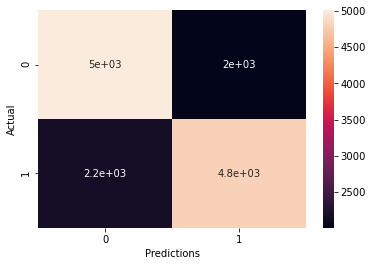

In [105]:
# Visualize the confusion matrix for the Decision Tree Classifier
cmd = pd.DataFrame(confusion_matrix(y_test, dtc_pre))
ax = sns.heatmap(cm, annot = True)
ax.set(xlabel = 'Predictions', ylabel = 'Actual')
plt.show()

### Logistic Regression

In [89]:
# Create regression and fit the data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Create variable for predictors
log_pre = logreg.predict(X_test)

# Add predictors to data frame
predictions['log_reg'] = log_pre

# Create variable for accuracy
acc_log = round(logreg.score(X_train, y_train)* 100, 2)

# Create variable for test accuracy
acc_test_log = round(logreg.score(X_test, y_test)*100, 2)

C:\Users\mille\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [84]:
# View the classification report
print(classification_report(y_test, log_pre))

              precision    recall  f1-score   support

           0       0.69      0.76      0.73      7015
           1       0.74      0.66      0.70      6985

    accuracy                           0.71     14000
   macro avg       0.72      0.71      0.71     14000
weighted avg       0.72      0.71      0.71     14000



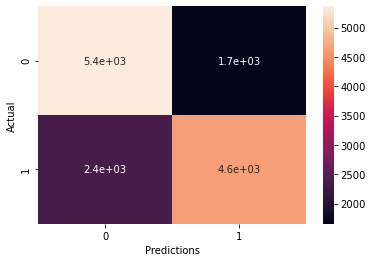

In [85]:
# View the confusion matrix for the logistic regression
cml = confusion_matrix(y_test, log_pre)
ax = sns.heatmap(cml, annot = True)
ax.set(xlabel = 'Predictions', ylabel = 'Actual')
plt.show()

### Ridge Classifier

In [90]:
# Create and fit the data to the ridge regression
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)

# Create variable for predictors
ridge_pre = ridge.predict(X_test)

# Add predictions to data frame
predictions['Ridge'] = ridge_pre

# Create variable for accuracy
acc_ridge = round(ridge.score(X_train, y_train)*100, 2)

# Create variable for test accuracy
acc_test_ridge = round(ridge.score(X_test, y_test)*100, 2)

In [91]:
# View the classification report
print(classification_report(y_test, ridge_pre))

              precision    recall  f1-score   support

           0       0.64      0.68      0.66      7015
           1       0.66      0.61      0.63      6985

    accuracy                           0.64     14000
   macro avg       0.65      0.64      0.64     14000
weighted avg       0.65      0.64      0.64     14000



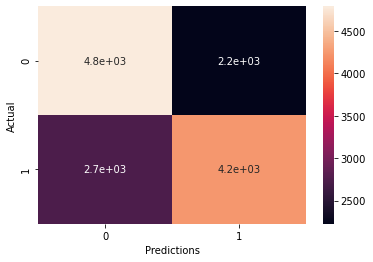

In [104]:
# View the confusion matrix for the ridge classifier
cmr = confusion_matrix(y_test, ridge_pre)
ax = sns.heatmap(cmr, annot = True)
ax.set(xlabel = 'Predictions', ylabel = 'Actual')
plt.show()

### K-Nearest Neighbors

In [101]:
# Create k-nearest neighbors and fit the data
knn = neighbors.KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

# Create variable for predictors
knn_pre = knn.predict(X_test)

# Add predictions to data frame
predictions['KNN'] = knn_pre

# Create variable for accuracy
acc_knn = round(knn.score(X_train, y_train)*100, 2)

# Create variable for test accuracy
acc_test_knn = round(knn.score(X_test, y_test)*100, 2)

In [102]:
# View classification report
print(classification_report(y_test, knn_pre))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      7015
           1       0.70      0.67      0.69      6985

    accuracy                           0.69     14000
   macro avg       0.69      0.69      0.69     14000
weighted avg       0.69      0.69      0.69     14000



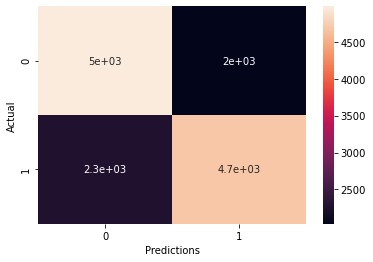

In [103]:
# View the confusion matrix for k-nearest neighbors
cmk = confusion_matrix(y_test, knn_pre)
ax = sns.heatmap(cmk, annot = True)
ax.set(xlabel = 'Predictions', ylabel = 'Actual')
plt.show()

In [106]:
# Create a data frame for the models and accuracies
models  = pd.DataFrame({'Model':['Random Forest', 'Decision Tree', 'Logistic Regression', 'Ridge Classifier', 'K-Nearest Neighbors'],
                       'Score Train': [acc_rfc, acc_dtc, acc_log, acc_ridge, acc_knn],
                      'Score Test':[acc_test_rfc, acc_test_dtc, acc_test_log, acc_test_ridge, acc_test_knn]})

In [107]:
# View the models accuracy for test and train data frame
models.sort_values(by = ['Score Train', 'Score Test'], ascending = True)

,Model,Score Train,Score Test
3,Ridge Classifier,64.67,64.48
2,Logistic Regression,71.79,71.33
4,K-Nearest Neighbors,77.98,69.16
0,Random Forest,96.66,70.21
1,Decision Tree,96.67,63.73


In [108]:
# Get the percentage difference between the accuracy scores of the train and test sets
models['Percent Difference'] = abs(models['Score Train'] - models['Score Test'])

# View the new data set
models.sort_values(by = ['Score Train', 'Score Test'], ascending = True)

,Model,Score Train,Score Test,Percent Difference
3,Ridge Classifier,64.67,64.48,0.19
2,Logistic Regression,71.79,71.33,0.46
4,K-Nearest Neighbors,77.98,69.16,8.82
0,Random Forest,96.66,70.21,26.45
1,Decision Tree,96.67,63.73,32.94


## Model Conclusions
Based on the few classifying algorithms I created, we can see that the Logistic Regression and the Random Forest Classifier had the best accuracy of 71.33% and 70.21% respectively of classifying an individual with cardiovascular disease. The Ridge Classifier had the smallest percent difference of 0.19% between the training model and the testing model, however, the accuracy of the Ridge Classifier was only 64.48% The accuracy of all these models is subject to change depending on the test size. For this experiment I chose a train/test split of 80/20. Of course there is always more ways to classify cardiovascular disease among individuals. Neural Networks and Gradient Boosting Classifiers can alter our findings. 